# Henry Ezeanowi
# 8900446

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns; 
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [81]:
df = pd.read_csv('heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [82]:
df.shape

(918, 12)

Information about the data

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [84]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [85]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [86]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Checking for and dropping duplicate values

In [87]:
(df.drop_duplicates()).shape

(918, 12)

### Remove outliers using mean,median,Z score

In [88]:
# Standardizing the numerical features using Z-score

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

for column in df.columns:
    if((((df[column].dtype) == 'int64') | ((df[column].dtype) == 'float64')) & (column != 'HeartDisease')):
        df[column] = scaler.fit_transform(df[column].values.reshape(-1,1))
    else:
        continue

print(df)

          Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG   
0   -1.433140   M           ATA   0.410909     0.825070  -0.551341     Normal  \
1   -0.478484   F           NAP   1.491752    -0.171961  -0.551341     Normal   
2   -1.751359   M           ATA  -0.129513     0.770188  -0.551341         ST   
3   -0.584556   F           ASY   0.302825     0.139040  -0.551341     Normal   
4    0.051881   M           NAP   0.951331    -0.034755  -0.551341     Normal   
..        ...  ..           ...        ...          ...        ...        ...   
913 -0.902775   M            TA  -1.210356     0.596393  -0.551341     Normal   
914  1.536902   M           ASY   0.627078    -0.053049   1.813758     Normal   
915  0.370100   M           ASY  -0.129513    -0.620168  -0.551341     Normal   
916  0.370100   F           ATA  -0.129513     0.340275  -0.551341        LVH   
917 -1.645286   M           NAP   0.302825    -0.217696  -0.551341     Normal   

        MaxHR ExerciseAngin

Removing the outliers with Z-score

In [89]:
df_filtered = df.loc[
    (df['Age'].between(-3, 3)) &
    (df['RestingBP'].between(-3, 3)) &
    (df['Cholesterol'].between(-3, 3)) &
    (df['FastingBS'].between(-3, 3)) &
    (df['MaxHR'].between(-3, 3)) &
    (df['Oldpeak'].between(-3, 3))
]

df_filtered

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.433140,M,ATA,0.410909,0.825070,-0.551341,Normal,1.382928,N,-0.832432,Up,0
1,-0.478484,F,NAP,1.491752,-0.171961,-0.551341,Normal,0.754157,N,0.105664,Flat,1
2,-1.751359,M,ATA,-0.129513,0.770188,-0.551341,ST,-1.525138,N,-0.832432,Up,0
3,-0.584556,F,ASY,0.302825,0.139040,-0.551341,Normal,-1.132156,Y,0.574711,Flat,1
4,0.051881,M,NAP,0.951331,-0.034755,-0.551341,Normal,-0.581981,N,-0.832432,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.902775,M,TA,-1.210356,0.596393,-0.551341,Normal,-0.188999,N,0.293283,Flat,1
914,1.536902,M,ASY,0.627078,-0.053049,1.813758,Normal,0.164684,N,2.357094,Flat,1
915,0.370100,M,ASY,-0.129513,-0.620168,-0.551341,Normal,-0.857069,Y,0.293283,Flat,1
916,0.370100,F,ATA,-0.129513,0.340275,-0.551341,LVH,1.461525,N,-0.832432,Flat,1


Convert text columns to numbers using label encoding and one hot encoding

In [90]:
# columns to encode
columns_to_encode = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

# one-hot encoding for the columns
encoded_df = pd.get_dummies(df_filtered, columns=columns_to_encode)

# Convert the One-hot-encoded 1 or 0
encoded_df.iloc[:, 6:] = encoded_df.iloc[:, 6:].astype(int)

# DataFrame after one-hot encoding
encoded_df

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,0.410909,0.825070,-0.551341,1.382928,-0.832432,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,-0.478484,1.491752,-0.171961,-0.551341,0.754157,0.105664,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,-1.751359,-0.129513,0.770188,-0.551341,-1.525138,-0.832432,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,-0.584556,0.302825,0.139040,-0.551341,-1.132156,0.574711,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,0.051881,0.951331,-0.034755,-0.551341,-0.581981,-0.832432,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.902775,-1.210356,0.596393,-0.551341,-0.188999,0.293283,1,0,1,0,...,0,1,0,1,0,1,0,0,1,0
914,1.536902,0.627078,-0.053049,1.813758,0.164684,2.357094,1,0,1,1,...,0,0,0,1,0,1,0,0,1,0
915,0.370100,-0.129513,-0.620168,-0.551341,-0.857069,0.293283,1,0,1,1,...,0,0,0,1,0,0,1,0,1,0
916,0.370100,-0.129513,0.340275,-0.551341,1.461525,-0.832432,1,1,0,0,...,0,0,1,0,0,1,0,0,1,0


Exploring the Data

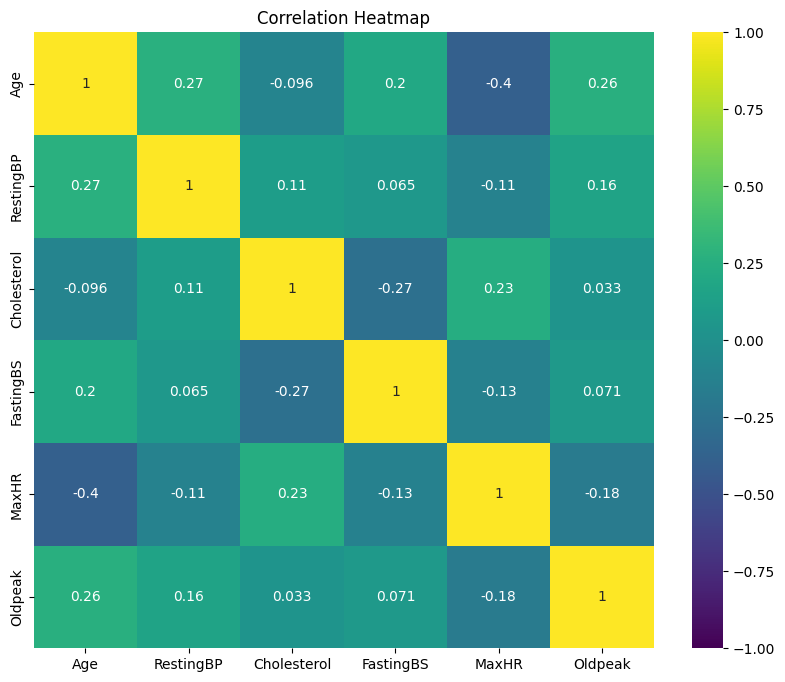

In [91]:
correlation_matrix = encoded_df.iloc[:,:6].corr()
# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="viridis", vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

There are no significant correlations between the independent variables

HeartDisease
1    492
0    407
Name: count, dtype: int64


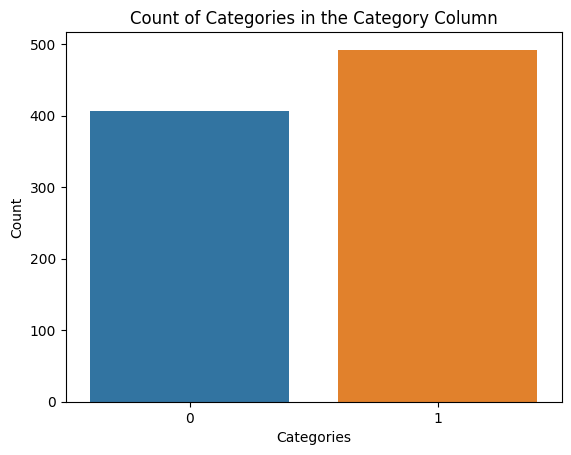

In [92]:
# Create the count plot
sns.countplot(data=encoded_df, x='HeartDisease')

# Get the counts for each category in the 'category_column'
value_counts = encoded_df['HeartDisease'].value_counts()
print(value_counts)

plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Count of Categories in the Category Column')

plt.show()

Exploring the count of males and females in the data

Sex
M    710
F    189
Name: count, dtype: int64


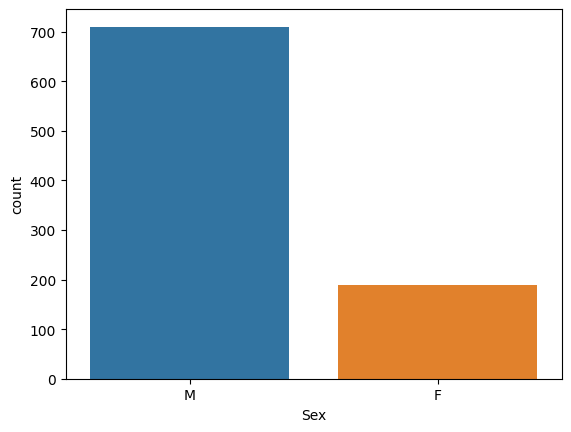

In [93]:
value_counts = df_filtered.Sex.value_counts()
print(value_counts)
sns.countplot(data=df_filtered, x='Sex')
plt.show()

Understanding the heart disease risk level in both male and females

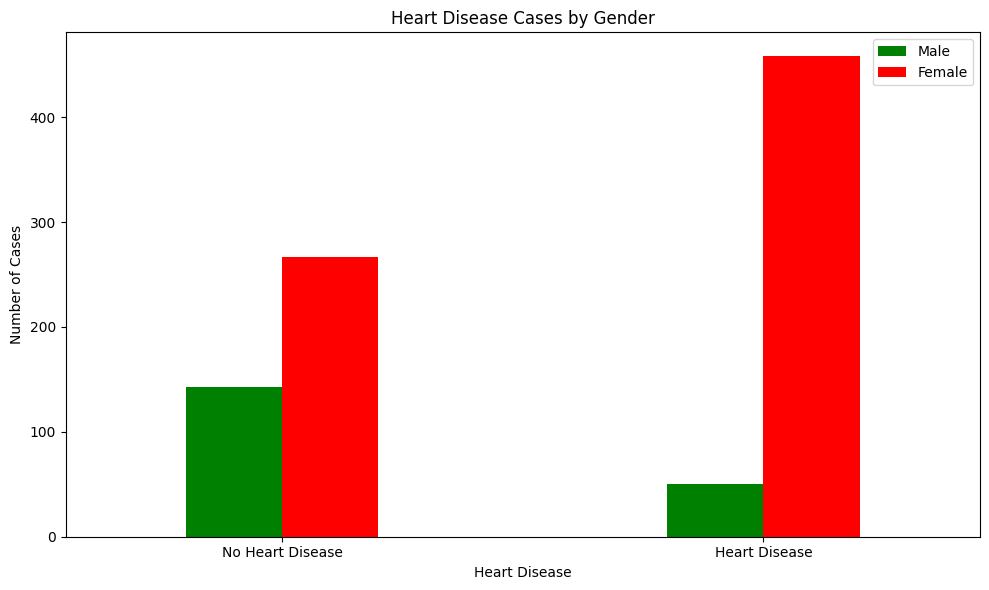

In [94]:
# Group the data by 'HeartDisease' and 'Sex', and calculate the counts
grouped = df.groupby(['HeartDisease', 'Sex']).size().unstack(fill_value=0)

# Create a side-by-side bar plot
ax = grouped.plot(kind='bar', figsize=(10, 6), color=['green', 'red'], width=0.4)
plt.title('Heart Disease Cases by Gender')
plt.xlabel('Heart Disease')
plt.ylabel('Number of Cases')
plt.xticks(ticks=[0, 1], labels=['No Heart Disease', 'Heart Disease'], rotation=0)
plt.legend(['Male', 'Female'])
plt.tight_layout()
plt.show()

Heart disease risk level in both male and females

Group the data by 'ChestPainType' and check the count

In [95]:
grouped = df_filtered['ChestPainType'].value_counts()
grouped

ChestPainType
ASY    483
NAP    200
ATA    171
TA      45
Name: count, dtype: int64

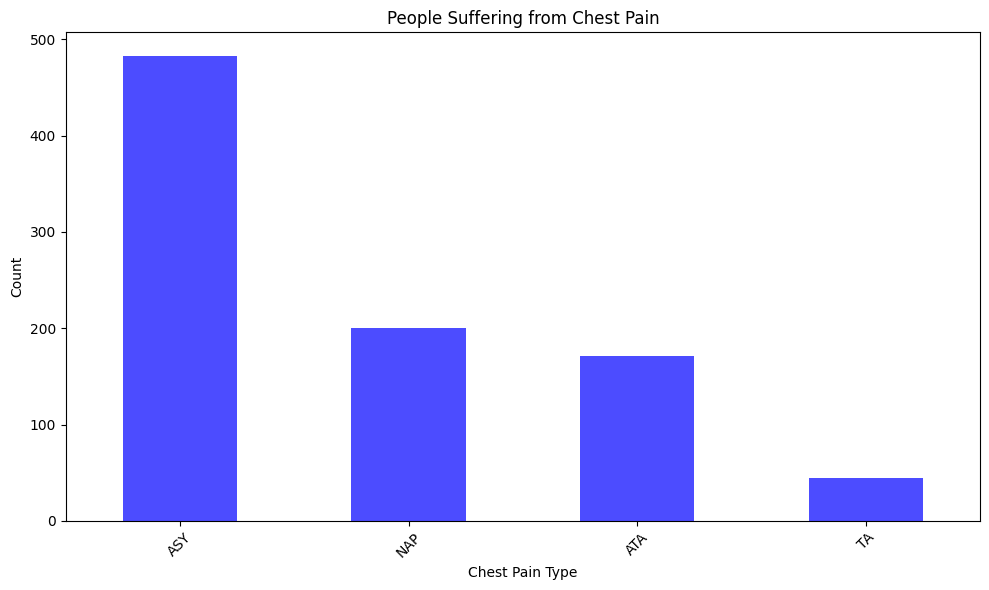

In [96]:
# Create a bar plot to visualize the counts of people with various types of chest pain
plt.figure(figsize=(10, 6))
grouped.plot(kind='bar', color='blue', alpha=0.7)
plt.title('People Suffering from Chest Pain')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Build a machine learning classification model using support vector machine. Demonstrate the standalone model as well as Bagging model and include observations about the performance.

Defining the Feature Matrix and Target Vector

In [97]:
# X = encoded_df.iloc[:,:-1]
X = encoded_df.drop(columns=['HeartDisease'])
y = encoded_df['HeartDisease'] 

Split into train and test data

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state=16)
print(y_train.value_counts())
print(y_test.value_counts())

HeartDisease
1    392
0    327
Name: count, dtype: int64
HeartDisease
1    100
0     80
Name: count, dtype: int64


Support Vector Machine Classifier (Stand Alone) Model

In [99]:
svm_model = svm.SVC(kernel='linear')
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

Predicting the heart disease using the model on test data

In [100]:
y_pred_svm = svm_model.predict(X_test)

y_pred_svm

array([0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1], dtype=int64)

SVM performance metrics

In [101]:
print("The accuracy score of the SVM standlone classifier is:", accuracy_score(y_test, y_pred_svm))

print("The confusion matrix of the SVM standlone classifier is:", confusion_matrix(y_test, y_pred_svm), sep = '\n')

print("The recall score of the SVM standlone classifier is:", recall_score(y_test, y_pred_svm))

print("The precision score of the SVM standlone classifier is:", precision_score(y_test, y_pred_svm))

print("The f1 score of the SVM standlone classifier is:", f1_score(y_test, y_pred_svm))

The accuracy score of the SVM standlone classifier is: 0.8833333333333333
The confusion matrix of the SVM standlone classifier is:
[[66 14]
 [ 7 93]]
The recall score of the SVM standlone classifier is: 0.93
The precision score of the SVM standlone classifier is: 0.8691588785046729
The f1 score of the SVM standlone classifier is: 0.8985507246376813


Cross validation on SVM standalone Classification model

In [102]:
# Finding the accuracy score on cross validation

cross_val_scores = cross_val_score(svm_model, X_train, y_train, cv=KFold(n_splits=5, shuffle=True, random_state=16))
print("Cross-validation accuracy scores:", cross_val_scores)
print("Mean accuracy:", cross_val_scores.mean())

from sklearn.metrics import make_scorer

# Define the precision scoring metric
precision_scorer = make_scorer(precision_score, average='weighted') 

# Perform cross-validation with precision scoring
cross_val_scores = cross_val_score(svm_model, X_train, y_train, cv=KFold(n_splits=5, shuffle=True, random_state=16), scoring=precision_scorer)

# Print the cross-validation scores
print("Cross-validation precision scores:", cross_val_scores)
print("Mean precision:", cross_val_scores.mean())

# Calculating the recall score using cross validation

scoring = make_scorer(recall_score, average='macro') 

recall_scores = cross_val_score(svm_model, X_train, y_train, cv=5, scoring=scoring)

# Print the recall scores for each fold
print("Cross-validation Recall Scores:", recall_scores)

# Calculate the mean recall score
mean_recall_score = recall_scores.mean()
print("Mean Recall Score:", mean_recall_score)

Cross-validation accuracy scores: [0.85416667 0.84722222 0.88194444 0.84722222 0.84615385]
Mean accuracy: 0.8553418803418802
Cross-validation precision scores: [0.86151442 0.84722222 0.88256448 0.84754915 0.848779  ]
Mean precision: 0.8575258538138189
Cross-validation Recall Scores: [0.80593963 0.85345667 0.87062937 0.9009324  0.81923077]
Mean Recall Score: 0.850037768139034


Building Support Vector Machine Classifier (Bagging) Model

In [121]:
# Fitting the Bagging model with SVM base estimator
bagging_svm_model = BaggingClassifier(estimator=svm.SVC(kernel='linear'),
                                    n_estimators=100, max_samples=0.8,
                                    oob_score=True, 
                                    random_state=16)
bagging_svm_model.fit(X_train, y_train)

BaggingClassifier(estimator=SVC(kernel='linear'), max_samples=0.8,
                  n_estimators=100, oob_score=True, random_state=16)

In [122]:
y_pred_bag_svm = bagging_svm_model.predict(X_test)

y_pred_bag_svm

array([0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1], dtype=int64)

SVM bagging classifier model performance metrics

In [124]:
print("The accuracy score of the SVM bagging classifier is:", accuracy_score(y_test, y_pred_bag_svm))

print("The confusion matrix of the SVM bagging classifier is:", confusion_matrix(y_test, y_pred_bag_svm), sep = '\n')

print("The recall score of the SVM bagging classifier is:", recall_score(y_test, y_pred_bag_svm))

print("The precision score of the SVM bagging classifier is:", precision_score(y_test, y_pred_bag_svm))

print("The f1 score of the SVM bagging classifier is:", f1_score(y_test, y_pred_bag_svm))

The accuracy score of the SVM bagging classifier is: 0.8888888888888888
The confusion matrix of the SVM bagging classifier is:
[[66 14]
 [ 6 94]]
The recall score of the SVM bagging classifier is: 0.94
The precision score of the SVM bagging classifier is: 0.8703703703703703
The f1 score of the SVM bagging classifier is: 0.9038461538461539


Cross validation on Bagging SVM Classification model

In [125]:
# Finding the accuracy score on cross validation

cross_val_scores = cross_val_score(bagging_svm_model, X_train, y_train, cv=KFold(n_splits=5, shuffle=True, random_state=16))
print("Cross-validation accuracy scores:", cross_val_scores)
print("Mean accuracy:", cross_val_scores.mean())

from sklearn.metrics import make_scorer

# Define the precision scoring metric
precision_scorer = make_scorer(precision_score, average='weighted') 

# Perform cross-validation with precision scoring
cross_val_scores = cross_val_score(bagging_svm_model, X_train, y_train, cv=KFold(n_splits=5, shuffle=True, random_state=16), scoring=precision_scorer)

# Print the cross-validation scores
print("Cross-validation precision scores:", cross_val_scores)
print("Mean precision:", cross_val_scores.mean())

# Calculating the recall score using cross validation

scoring = make_scorer(recall_score, average='macro') 

recall_scores = cross_val_score(bagging_svm_model, X_train, y_train, cv=5, scoring=scoring)

# Print the recall scores for each fold
print("Cross-validation Recall Scores:", recall_scores)

# Calculate the mean recall score
mean_recall_score = recall_scores.mean()
print("Mean Recall Score:", mean_recall_score)

Cross-validation accuracy scores: [0.86111111 0.83333333 0.875      0.84027778 0.85314685]
Mean accuracy: 0.8525738150738151
Cross-validation precision scores: [0.86723692 0.83397833 0.87769542 0.84037423 0.85487631]
Mean precision: 0.8548322410041951
Cross-validation Recall Scores: [0.81363194 0.85345667 0.87820513 0.9009324  0.81282051]
Mean Recall Score: 0.8518093299105957


***OBSERVATIONS*** </br>

***The Bagging SVM classifier model performed better than the Standalone SVM in all aspects of the classification report, which shows that the bagging method significantly enhanced the model's performance. The bagging method helps to reduce variance and enhances generalization, which produces better outcomes.***

### Now use decision tree classifier. Use standalone model as well as Bagging and check if you notice any difference in performance

Decision Tree Classification (Stand Alone) Model

In [107]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [108]:
y_pred_tree = tree_model.predict(X_test)

y_pred_tree

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1], dtype=int64)

Decision Tree classifier model performance metrics

In [109]:
print("The accuracy score of the standalone Decision Tree classifier is:", accuracy_score(y_test, y_pred_tree))

print("The confusion matrix of the standalone Decision Tree classifier is:", confusion_matrix(y_test, y_pred_tree), sep = '\n')

print("The recall score of the standalone Decision Tree classifier is:", recall_score(y_test, y_pred_tree))

print("The precision score of the standalone Decision Tree classifier is:", precision_score(y_test, y_pred_tree))

print("The f1 score of the standalone Decision Tree classifier is:", f1_score(y_test, y_pred_tree))

The accuracy score of the standalone Decision Tree classifier is: 0.8166666666666667
The confusion matrix of the standalone Decision Tree classifier is:
[[62 18]
 [15 85]]
The recall score of the standalone Decision Tree classifier is: 0.85
The precision score of the standalone Decision Tree classifier is: 0.8252427184466019
The f1 score of the standalone Decision Tree classifier is: 0.8374384236453202


Cross validation on Standalone Decision Tree Classification model

In [110]:
# Finding the accuracy score on cross validation

cross_val_scores = cross_val_score(tree_model, X_train, y_train, cv=KFold(n_splits=5, shuffle=True, random_state=16))
print("Cross-validation accuracy scores:", cross_val_scores)
print("Mean accuracy:", cross_val_scores.mean())

from sklearn.metrics import make_scorer

# Define the precision scoring metric
precision_scorer = make_scorer(precision_score, average='weighted') 

# Perform cross-validation with precision scoring
cross_val_scores = cross_val_score(tree_model, X_train, y_train, cv=KFold(n_splits=5, shuffle=True, random_state=16), scoring=precision_scorer)

# Print the cross-validation scores
print("Cross-validation precision scores:", cross_val_scores)
print("Mean precision:", cross_val_scores.mean())

# Calculating the recall score using cross validation

scoring = make_scorer(recall_score, average='macro') 

recall_scores = cross_val_score(tree_model, X_train, y_train, cv=5, scoring=scoring)

# Print the recall scores for each fold
print("Cross-validation Recall Scores:", recall_scores)

# Calculate the mean recall score
mean_recall_score = recall_scores.mean()
print("Mean Recall Score:", mean_recall_score)

Cross-validation accuracy scores: [0.78472222 0.75       0.85416667 0.75694444 0.86713287]
Mean accuracy: 0.8025932400932401
Cross-validation precision scores: [0.78073788 0.73567708 0.83333333 0.73663878 0.864766  ]
Mean precision: 0.7902306152899939
Cross-validation Recall Scores: [0.75258033 0.77974684 0.79428904 0.80011655 0.77179487]
Mean Recall Score: 0.7797055265409696


Decision Tree Classification (Bagging) Model

In [111]:
bag_tree_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(), 
    n_estimators=500, 
    max_samples=0.8, 
    oob_score=True,
    random_state=16
)

bag_tree_model.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=0.8,
                  n_estimators=500, oob_score=True, random_state=16)

In [112]:
y_pred_bag_tree = bag_tree_model.predict(X_test)

y_pred_bag_tree

array([0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1], dtype=int64)

Bagging Decision Tree classifier model performance metrics

In [113]:
print("The accuracy score of the Bagging Decision Tree classifier is:", accuracy_score(y_test, y_pred_bag_tree))

print("The confusion matrix of the Bagging Decision Tree classifier is:", confusion_matrix(y_test, y_pred_bag_tree), sep = '\n')

print("The recall score of the Bagging Decision Tree classifier is:", recall_score(y_test, y_pred_bag_tree))

print("The precision score of the Bagging Decision Tree classifier is:", precision_score(y_test, y_pred_bag_tree))

print("The f1 score of the Bagging Decision Tree classifier is:", f1_score(y_test, y_pred_bag_tree))

The accuracy score of the Bagging Decision Tree classifier is: 0.8944444444444445
The confusion matrix of the Bagging Decision Tree classifier is:
[[67 13]
 [ 6 94]]
The recall score of the Bagging Decision Tree classifier is: 0.94
The precision score of the Bagging Decision Tree classifier is: 0.8785046728971962
The f1 score of the Bagging Decision Tree classifier is: 0.9082125603864735


Cross validation on Bagging Decision Tree Classification model

In [126]:
# Finding the accuracy score on cross validation

cross_val_scores = cross_val_score(bag_tree_model, X_train, y_train, cv=KFold(n_splits=5, shuffle=True, random_state=16))
print("Cross-validation accuracy scores:", cross_val_scores)
print("Mean accuracy:", cross_val_scores.mean())

from sklearn.metrics import make_scorer

# Define the precision scoring metric
precision_scorer = make_scorer(precision_score, average='weighted') 

# Perform cross-validation with precision scoring
cross_val_scores = cross_val_score(bag_tree_model, X_train, y_train, cv=KFold(n_splits=5, shuffle=True, random_state=16), scoring=precision_scorer)

# Print the cross-validation scores
print("Cross-validation precision scores:", cross_val_scores)
print("Mean precision:", cross_val_scores.mean())

# Calculating the recall score using cross validation

scoring = make_scorer(recall_score, average='macro') 

recall_scores = cross_val_score(bag_tree_model, X_train, y_train, cv=5, scoring=scoring)

# Print the recall scores for each fold
print("Cross-validation Recall Scores:", recall_scores)

# Calculate the mean recall score
mean_recall_score = recall_scores.mean()
print("Mean Recall Score:", mean_recall_score)

Cross-validation accuracy scores: [0.85416667 0.82638889 0.89583333 0.82638889 0.86013986]
Mean accuracy: 0.8525835275835275
Cross-validation precision scores: [0.85678781 0.82624959 0.89817387 0.82705652 0.86267066]
Mean precision: 0.8541876906086154
Cross-validation Recall Scores: [0.80457644 0.83310613 0.87587413 0.86538462 0.83076923]
Mean Recall Score: 0.841942108524387


***OBSERVATIONS*** </br>

***The Bagging Decision Tree classifier model performed better than the Standalone decision tree model in all aspects of the classification report, which shows that the bagging method significantly enhanced the model's performance. The bagging method helps to reduce variance and enhances generalization, which produces better outcomes.***

### Comparing performance of svm and decision tree classifier figure out where it makes most sense to use bagging and why.

The Decision Tree model had an improvement in accuracy with bagging. 

The SVM models consistently had higher accuracy than the Decision Tree models, which shows the SVM model performed better

It makes more sense to use bagging in decision trees because it reduces overfitting and improves their generalization capability.